In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

importing data

In [3]:
data=pd.read_csv('Mall_Customers.csv')
print(data.head())

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking for null values

In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
x=data.iloc[:,3:5].values

Choosing Optimum number of Clusters

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    k_means=KMeans(n_clusters=i,init='k-means++',random_state=0)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37239.83554245604, 30273.394312070028, 25018.576334776328, 21850.16528258562]


Text(0.5, 1.0, 'Elbow Method')

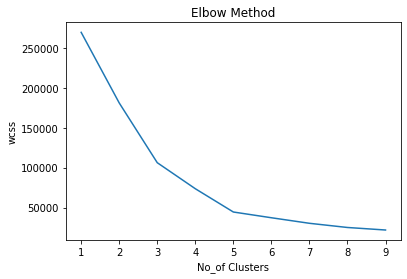

In [27]:
plt.plot(np.arange(1,10),wcss)
plt.xlabel("No_of Clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")

Model Training with Optimum Clusters

In [28]:
k_means=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=k_means.fit_predict(x)
print(y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Visualizing the Clusters

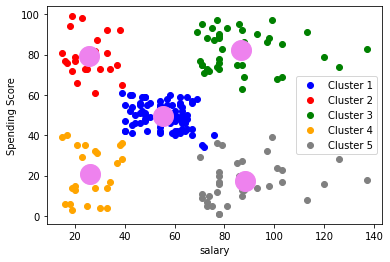

In [43]:
plt.scatter(x[y==0,0],x[y==0,1],color='blue',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],color='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],color='green',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],color='orange',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],color='grey',label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=400,color='violet')
plt.xlabel('salary')
plt.ylabel('Spending Score')
plt.legend()